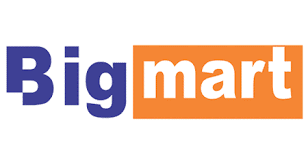

### Problem Statement:

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

- bigdatamart_Train.csv: Use this file for the model building purpose. 

- bigdatamart_Test.csv: Use this file for getting predictions from the trained model. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
import statsmodels.api as sma
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

C:\Users\prita\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\prita\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
training = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
training

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
testing = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')
testing

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [4]:
df = pd.concat([training, testing], ignore_index=True, sort = False)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN


### Univariate Analysis

In [5]:
df.shape

(14204, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [7]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [8]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [9]:
training.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot:>

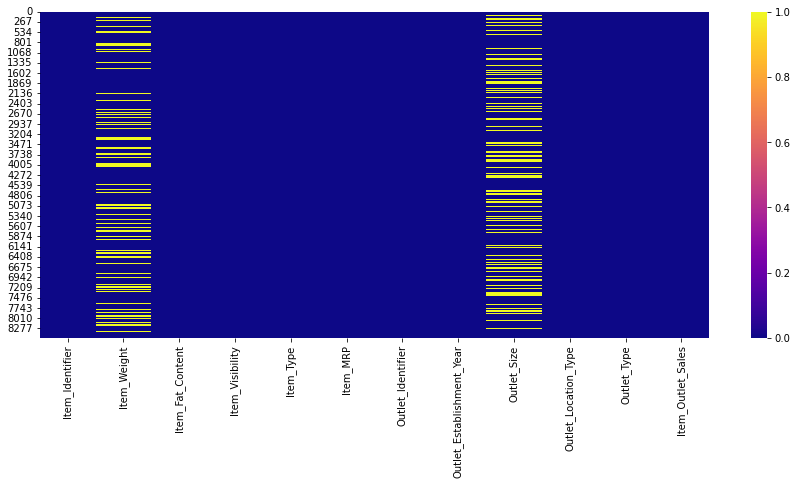

In [10]:
plt.figure(figsize=(15,6))

sns.heatmap(training.isnull(),cmap='plasma')

In [11]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [12]:
training.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

Item visibility has minimum value of 0 which is impossible. We will remove it.

In [13]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [14]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [15]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [16]:
df['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [17]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [18]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [19]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

### Reorganising Column Data and Visualizing

In [20]:
df.loc[df['Item_Fat_Content'] == 'low fat', 'Item_Fat_Content'] = 'Low Fat'
df.loc[df['Item_Fat_Content'] == 'LF', 'Item_Fat_Content'] = 'Low Fat'
df.loc[df['Item_Fat_Content'] == 'reg', 'Item_Fat_Content'] = 'Regular'

In [21]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

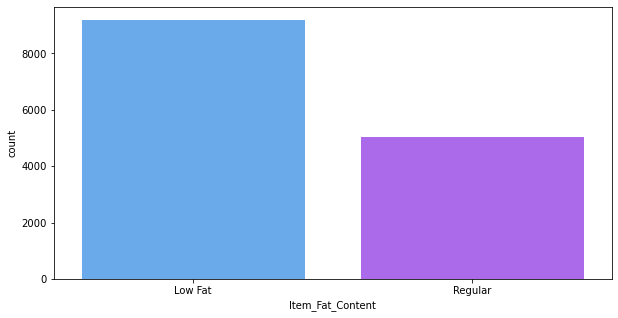

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(df['Item_Fat_Content'],palette='cool')

Most items are low fat.

In [23]:
fresh_foods = ['Dairy', 'Meat', 'Fruits and Vegetables', 'Seafood', 'Breads']
packed_foods = ['Snack Foods', 'Frozen Foods', 'Breakfast', 'Canned', 'Starchy Foods']
other_items = ['Soft Drinks', 'Household', 'Baking Goods', 'Health and Hygiene', 'Hard Drinks', 'Others']

In [24]:
for i in fresh_foods:
    df.loc[df['Item_Type'] == i, 'Item_Type'] = 'fresh'
for i in packed_foods:
    df.loc[df['Item_Type'] == i, 'Item_Type'] = 'packaged'
for i in other_items:
    df.loc[df['Item_Type'] == i, 'Item_Type'] = 'other'

In [25]:
df['Item_Type'].unique()

array(['fresh', 'other', 'packaged'], dtype=object)

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

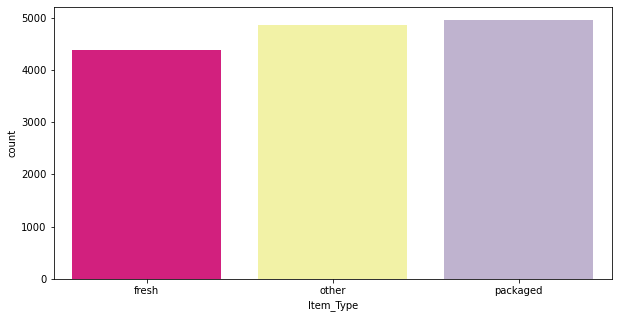

In [26]:
plt.figure(figsize=(10,5))

sns.countplot(df['Item_Type'],palette='Accent_r')

Highest number of products are packaged foods, 2nd highest is miscellaneous products and 3rd is fresh foods.

In [27]:
eighties = [1985, 1987]
nineties = [1997, 1998, 1999]
twothousands = [2002, 2004, 2007, 2009]

In [28]:
for i in eighties:
    df.loc[df['Outlet_Establishment_Year'] == i, 'Outlet_Establishment_Year'] = '80s'
for i in nineties:
    df.loc[df['Outlet_Establishment_Year'] == i, 'Outlet_Establishment_Year'] = '90s'
for i in twothousands:
    df.loc[df['Outlet_Establishment_Year'] == i, 'Outlet_Establishment_Year'] = '00s'

In [29]:
df['Outlet_Establishment_Year'].unique()

array(['90s', '00s', '80s'], dtype=object)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

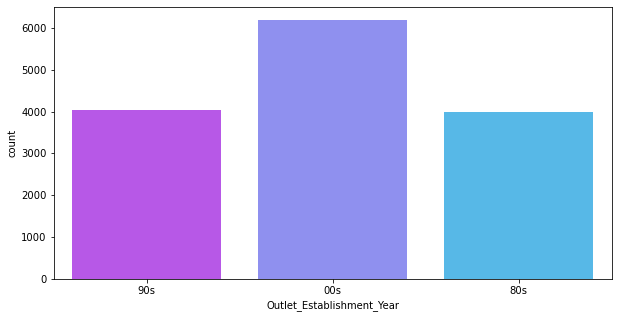

In [30]:
plt.figure(figsize=(10,5))

sns.countplot(df['Outlet_Establishment_Year'],palette='cool_r')

Most outlets were established in the 2000s, and an equal amount in the 90s and 80s.

### Imputing missing values in Outlet Size column

In [31]:
from scipy.stats import mode

outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]) )
print('Mode for each Outlet_Type:')
print(outlet_size_mode)

miss_bool = df['Outlet_Size'].isnull() 

df.loc[miss_bool,'Outlet_Size'] = df.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
print(sum(df['Outlet_Size'].isnull()))

Mode for each Outlet_Type:
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  
0


In [32]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

All null values in Outlet Size have been replaced by the mode or most frequently occuring outlet size.

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

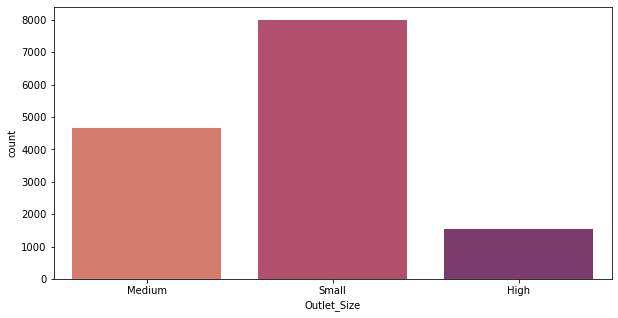

In [33]:
plt.figure(figsize=(10,5))

sns.countplot(df['Outlet_Size'],palette='flare')

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

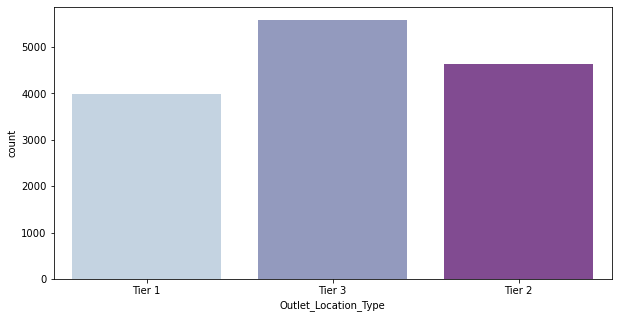

In [34]:
plt.figure(figsize=(10,5))

sns.countplot(df['Outlet_Location_Type'],palette='BuPu')

Most outlets are in tier 3 location, 2nd highest in tier 2 and least in Tier 1.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

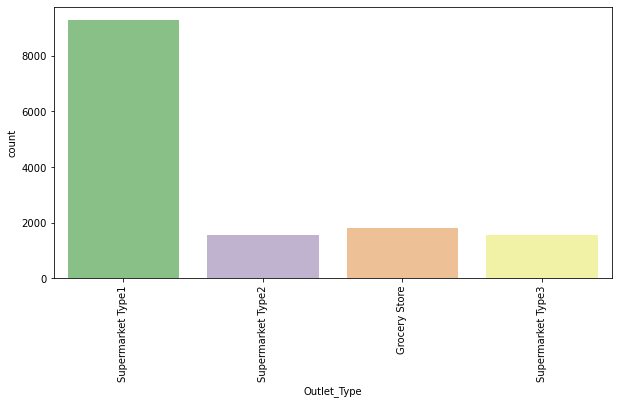

In [35]:
plt.figure(figsize=(10,5))

sns.countplot(df['Outlet_Type'],palette='Accent')
plt.xticks(rotation=90)

Most outlets are supermarket type 1. Least are super market type 2. Grocery stores are 2nd most common but they are around one fifth in quantity compared to Supermarket type 1.

### Dropping unnecessary columns

In [36]:
df.drop('Item_Identifier', axis=1, inplace=True)
df.drop('Item_Weight', axis=1, inplace=True)

In [37]:
df

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Low Fat,0.016047,fresh,249.8092,OUT049,90s,Medium,Tier 1,Supermarket Type1,3735.1380
1,Regular,0.019278,other,48.2692,OUT018,00s,Medium,Tier 3,Supermarket Type2,443.4228
2,Low Fat,0.016760,fresh,141.6180,OUT049,90s,Medium,Tier 1,Supermarket Type1,2097.2700
3,Regular,0.000000,fresh,182.0950,OUT010,90s,Small,Tier 3,Grocery Store,732.3800
4,Low Fat,0.000000,other,53.8614,OUT013,80s,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
14199,Regular,0.013496,packaged,141.3154,OUT046,90s,Small,Tier 1,Supermarket Type1,NaN
14200,Regular,0.142991,packaged,169.1448,OUT018,00s,Medium,Tier 3,Supermarket Type2,NaN
14201,Low Fat,0.073529,other,118.7440,OUT045,00s,Small,Tier 2,Supermarket Type1,NaN
14202,Regular,0.000000,packaged,214.6218,OUT017,00s,Small,Tier 2,Supermarket Type1,NaN


### Encoding object type columns to analyse more clearly.

In [38]:
oe = OrdinalEncoder()
list1 = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Establishment_Year']
for i in list1:
    df[i] = oe.fit_transform(df[i].values.reshape(-1,1).astype(str))
df

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.0,0.016047,0.0,249.8092,9.0,2.0,1.0,0.0,1.0,3735.1380
1,1.0,0.019278,1.0,48.2692,3.0,0.0,1.0,2.0,2.0,443.4228
2,0.0,0.016760,0.0,141.6180,9.0,2.0,1.0,0.0,1.0,2097.2700
3,1.0,0.000000,0.0,182.0950,0.0,2.0,2.0,2.0,0.0,732.3800
4,0.0,0.000000,1.0,53.8614,1.0,1.0,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...
14199,1.0,0.013496,2.0,141.3154,8.0,2.0,2.0,0.0,1.0,NaN
14200,1.0,0.142991,2.0,169.1448,3.0,0.0,1.0,2.0,2.0,NaN
14201,0.0,0.073529,1.0,118.7440,7.0,0.0,2.0,1.0,1.0,NaN
14202,1.0,0.000000,2.0,214.6218,2.0,0.0,2.0,1.0,1.0,NaN


In [39]:
df.nunique()

Item_Fat_Content                 2
Item_Visibility              13006
Item_Type                        3
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        3
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3493
dtype: int64

In [40]:
df.corr()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Fat_Content,1.000000,0.044274,0.009947,-0.004019,-0.001095,0.000167,-0.000138,0.001373,-0.000228,0.018719
Item_Visibility,0.044274,1.000000,0.002124,-0.006351,-0.106181,0.075433,0.093146,-0.017362,-0.165726,-0.128625
Item_Type,0.009947,0.002124,1.000000,-0.013700,0.003049,-0.003350,-0.002269,-0.000604,0.004416,-0.004237
Item_MRP,-0.004019,-0.006351,-0.013700,1.000000,-0.000555,0.000259,-0.001052,0.000838,0.000136,0.567574
Outlet_Identifier,-0.001095,-0.106181,0.003049,-0.000555,1.000000,0.258828,0.260217,-0.716151,0.099899,0.162325
Outlet_Establishment_Year,0.000167,0.075433,-0.003350,0.000259,0.258828,1.000000,-0.146470,-0.361088,-0.215724,-0.082604
Outlet_Size,-0.000138,0.093146,-0.002269,-0.001052,0.260217,-0.146470,1.000000,-0.480055,-0.401405,-0.162753
Outlet_Location_Type,0.001373,-0.017362,-0.000604,0.000838,-0.716151,-0.361088,-0.480055,1.000000,0.467251,0.089367
Outlet_Type,-0.000228,-0.165726,0.004416,0.000136,0.099899,-0.215724,-0.401405,0.467251,1.000000,0.401522
Item_Outlet_Sales,0.018719,-0.128625,-0.004237,0.567574,0.162325,-0.082604,-0.162753,0.089367,0.401522,1.000000


<AxesSubplot:>

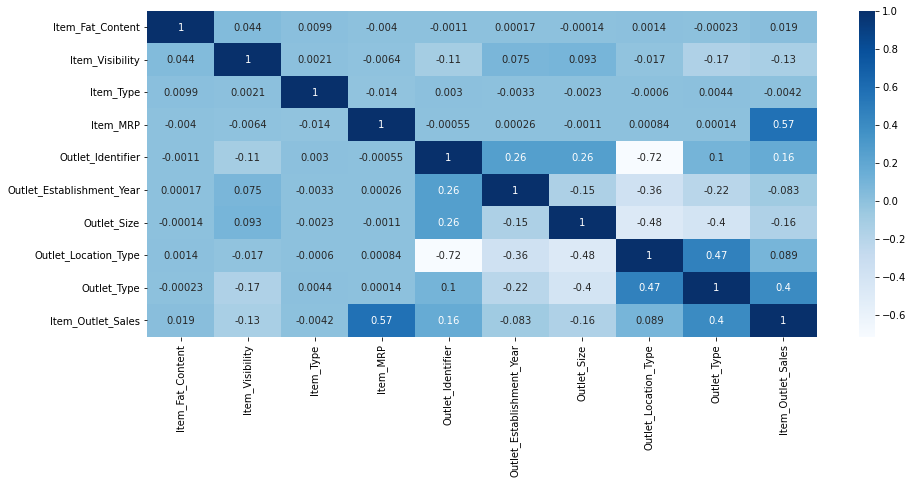

In [41]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

Highest positive correlation is between MRP and Item Outlet Sales. There is high negative correlation between outlet identifier and outlet location type

In [42]:
df.skew()

Item_Fat_Content             0.613645
Item_Visibility              1.195175
Item_Type                   -0.072483
Item_MRP                     0.130728
Outlet_Identifier           -0.059994
Outlet_Establishment_Year    0.291277
Outlet_Size                 -0.861786
Outlet_Location_Type        -0.209053
Outlet_Type                  0.927344
Item_Outlet_Sales            1.177531
dtype: float64

array([[<AxesSubplot:title={'center':'Item_Fat_Content'}>,
        <AxesSubplot:title={'center':'Item_Visibility'}>,
        <AxesSubplot:title={'center':'Item_Type'}>],
       [<AxesSubplot:title={'center':'Item_MRP'}>,
        <AxesSubplot:title={'center':'Outlet_Identifier'}>,
        <AxesSubplot:title={'center':'Outlet_Establishment_Year'}>],
       [<AxesSubplot:title={'center':'Outlet_Size'}>,
        <AxesSubplot:title={'center':'Outlet_Location_Type'}>,
        <AxesSubplot:title={'center':'Outlet_Type'}>],
       [<AxesSubplot:title={'center':'Item_Outlet_Sales'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

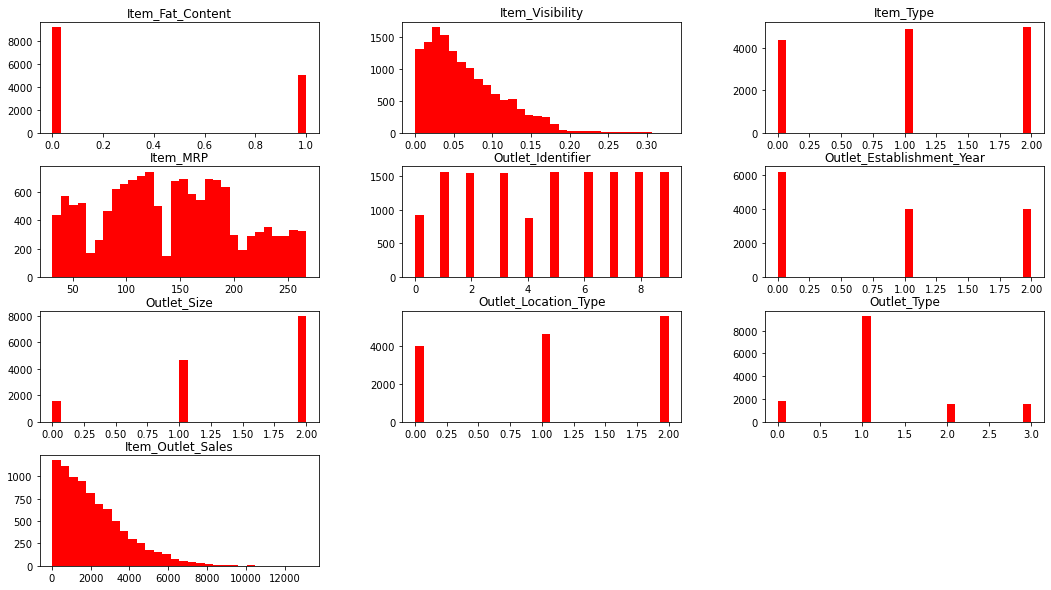

In [43]:
df.hist(figsize=(18,10), grid=False, layout=(4, 3), bins = 30, color='r')

We can observe a small amount of skewness in item visibility and item outlet sales

Text(0.5, 1.0, 'Item Visibility')

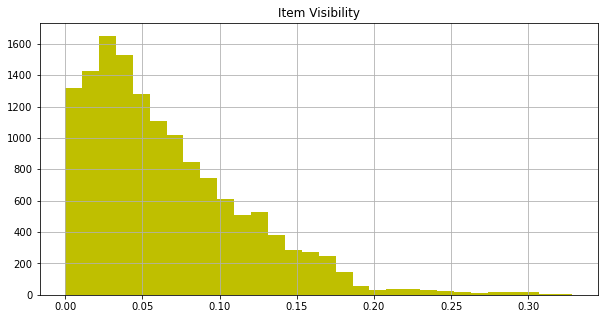

In [44]:
df['Item_Visibility'].hist(figsize=(10,5), bins=30, color='y')
plt.title('Item Visibility')

Item visibility column is slightly right skewed with a skewness value of 1.195

Text(0.5, 1.0, 'Item MRP')

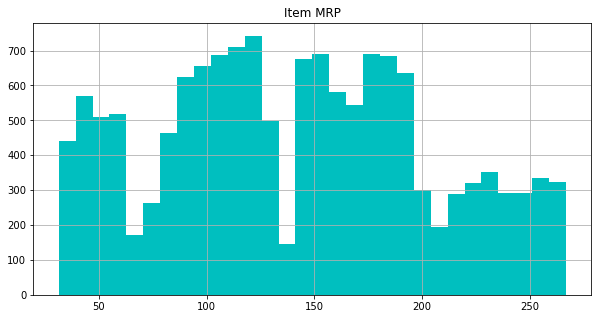

In [45]:
df['Item_MRP'].hist(figsize=(10,5), bins=30, color='c')
plt.title('Item MRP')

MRP of items does not have skewness but it does have dips in certain points

Text(0.5, 1.0, 'Item Outlet Sales')

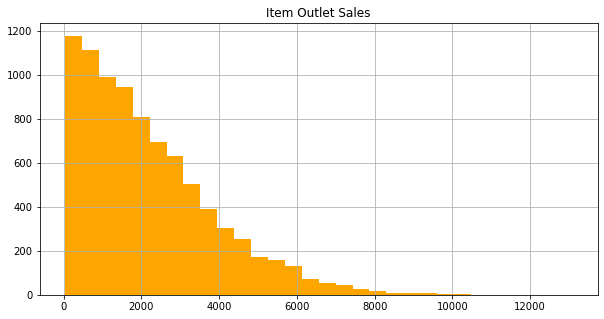

In [46]:
df['Item_Outlet_Sales'].hist(figsize=(10,5), bins=30, color='orange')
plt.title('Item Outlet Sales')

Skewness is present. This data is right skewed.

Text(0.5, 1.0, 'Outliers in the columns')

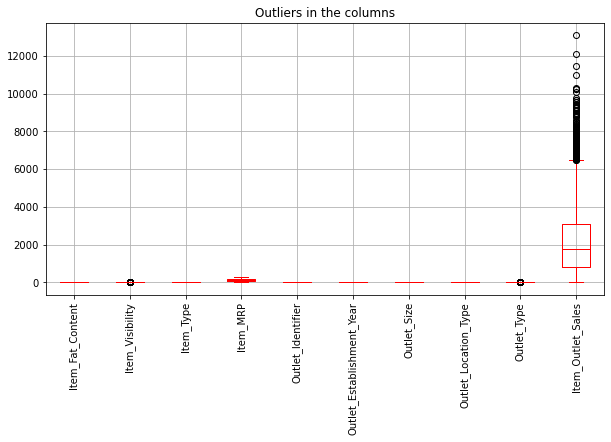

In [47]:
df.boxplot(figsize=(10,5), color='red')
plt.xticks(rotation= 90)
plt.title('Outliers in the columns')

Some outliers in features, but a lot of outliers in target.

<AxesSubplot:>

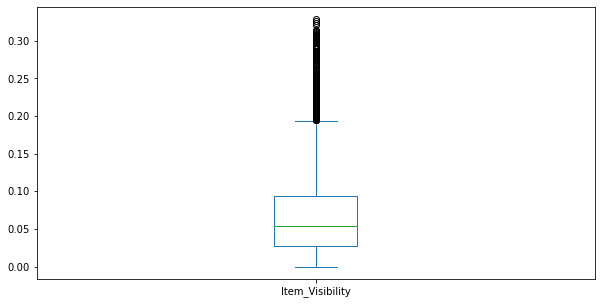

In [48]:
plt.figure(figsize=(10,5))

df['Item_Visibility'].plot.box()

Many outliers in item visibility

<AxesSubplot:>

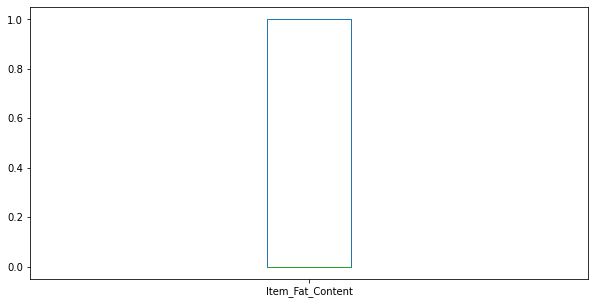

In [49]:
plt.figure(figsize=(10,5))

df['Item_Fat_Content'].plot.box()

No outliers

<AxesSubplot:>

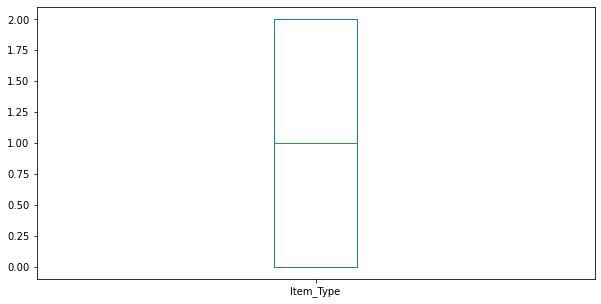

In [50]:
plt.figure(figsize=(10,5))

df['Item_Type'].plot.box()

No outliers

<AxesSubplot:>

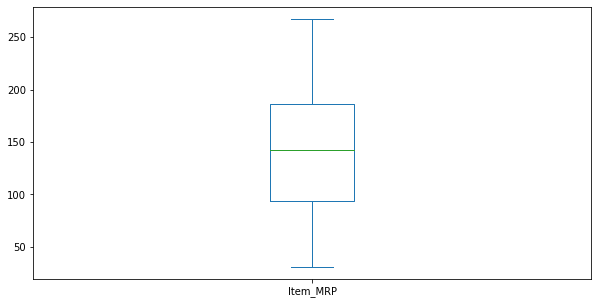

In [51]:
plt.figure(figsize=(10,5))

df['Item_MRP'].plot.box()

No outliers

In [52]:
df.columns

Index(['Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

<AxesSubplot:>

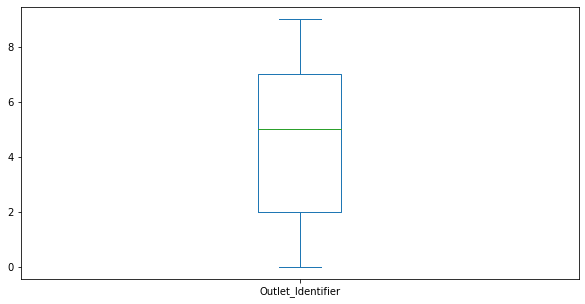

In [53]:
plt.figure(figsize=(10,5))

df['Outlet_Identifier'].plot.box()

No outliers

<AxesSubplot:>

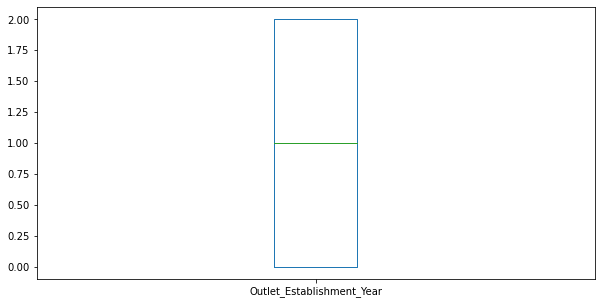

In [54]:
plt.figure(figsize=(10,5))

df['Outlet_Establishment_Year'].plot.box()

No outliers

<AxesSubplot:>

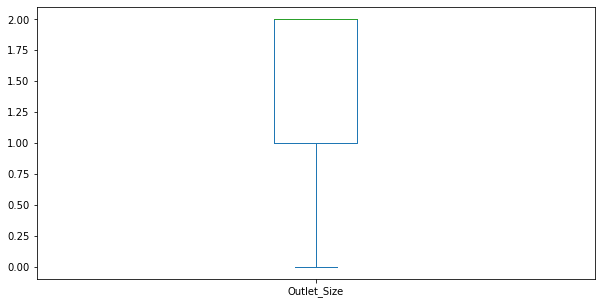

In [55]:
plt.figure(figsize=(10,5))

df['Outlet_Size'].plot.box()

No outliers

<AxesSubplot:>

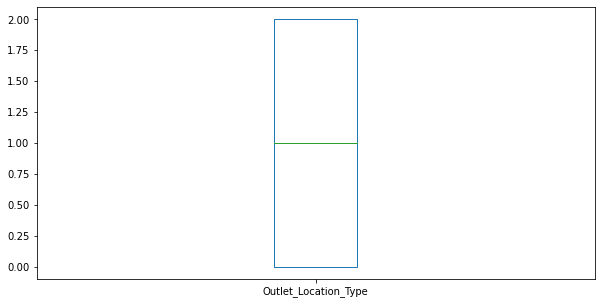

In [56]:
plt.figure(figsize=(10,5))

df['Outlet_Location_Type'].plot.box()

No outliers

<AxesSubplot:>

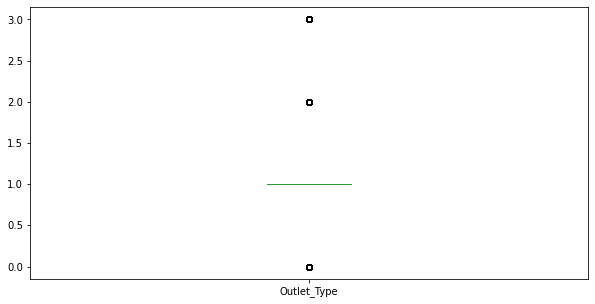

In [57]:
plt.figure(figsize=(10,5))

df['Outlet_Type'].plot.box()

Some outliers present

<AxesSubplot:>

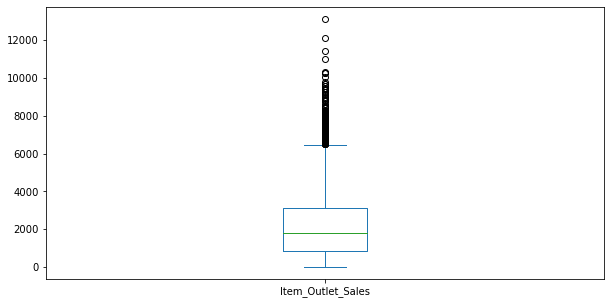

In [58]:
plt.figure(figsize=(10,5))

df['Item_Outlet_Sales'].plot.box()

Several outliers present in target.

## Bivariate analysis

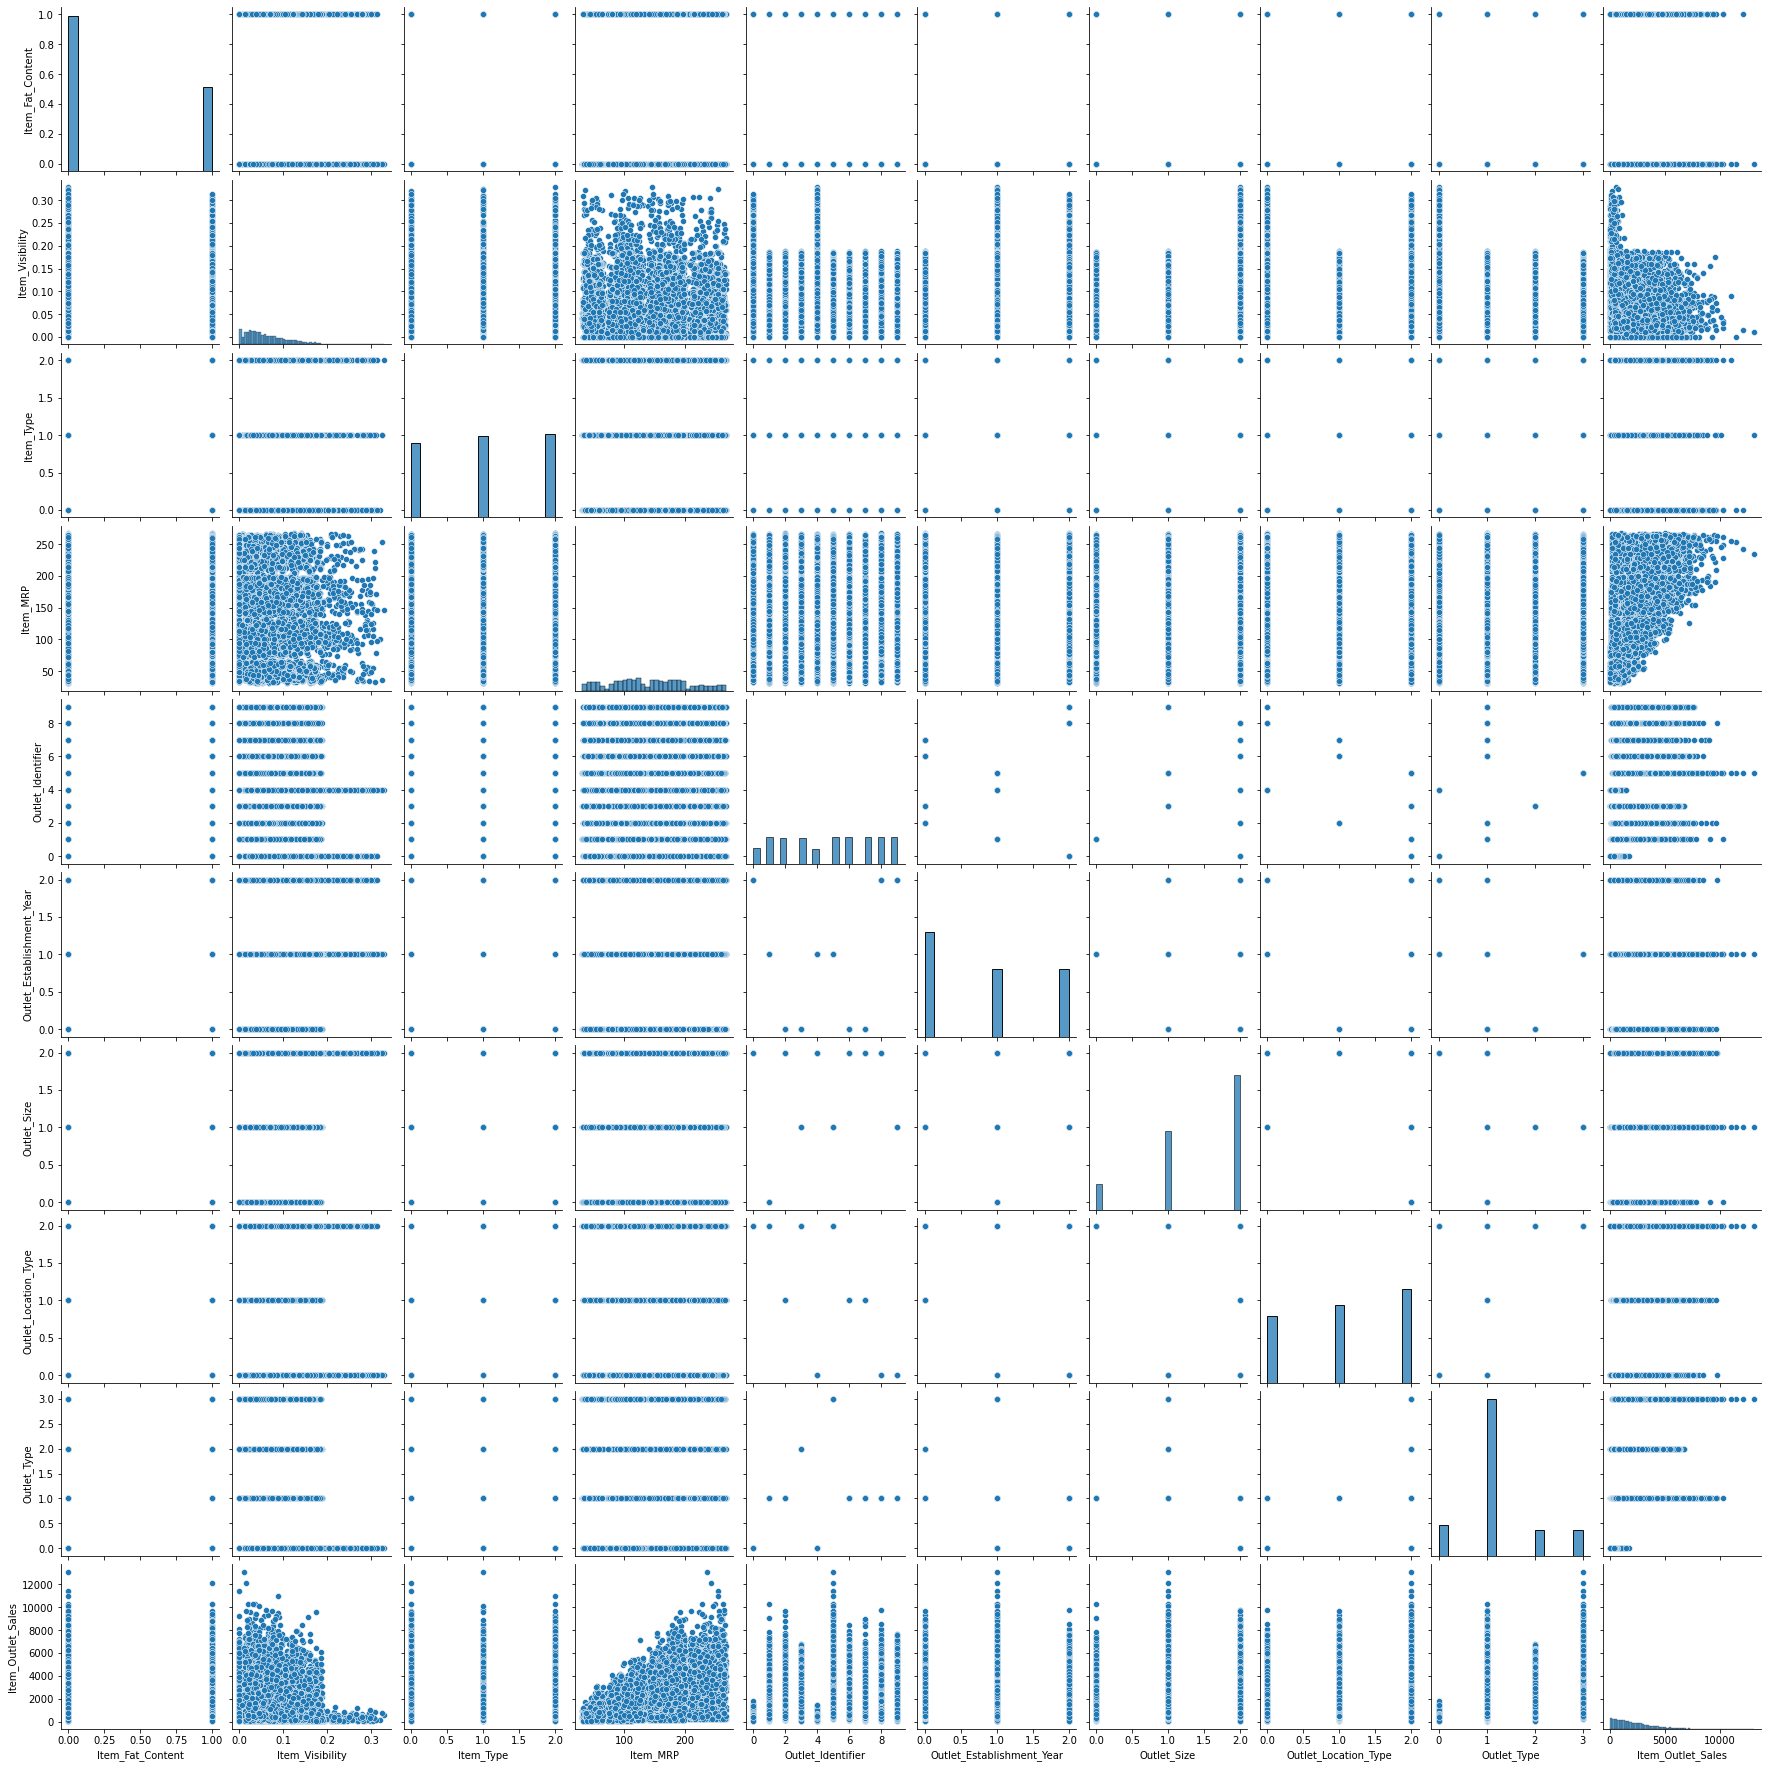

In [59]:
sns.pairplot(df)

Item MRP and Item outlet sales have the highest positive correlation

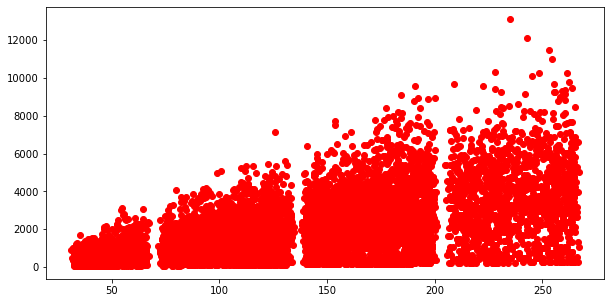

In [60]:
plt.figure(figsize=(10,5))

plt.scatter(x=df['Item_MRP'],y=df['Item_Outlet_Sales'],color='r')

Very highly correlated

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

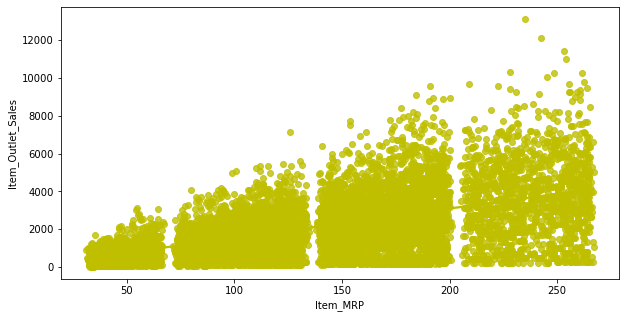

In [61]:
plt.figure(figsize=(10,5))

sns.regplot('Item_MRP','Item_Outlet_Sales',df, color='y')

High positive correlation

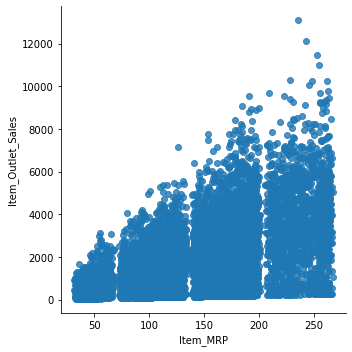

In [62]:
sns.lmplot('Item_MRP','Item_Outlet_Sales',df)

High positive correlation

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

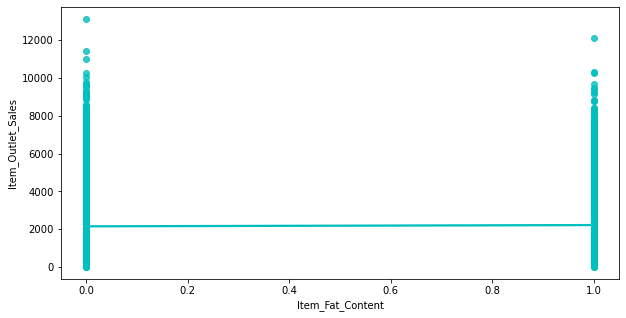

In [63]:
plt.figure(figsize=(10,5))

sns.regplot('Item_Fat_Content','Item_Outlet_Sales',df,color='c')

Not much correlation between fat content and outlet sales

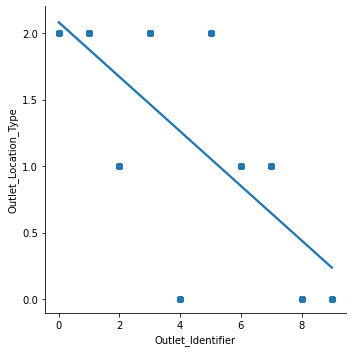

In [64]:
sns.lmplot('Outlet_Identifier','Outlet_Location_Type',df)

High negative correlation

## Skewness

In [65]:
df.skew()

Item_Fat_Content             0.613645
Item_Visibility              1.195175
Item_Type                   -0.072483
Item_MRP                     0.130728
Outlet_Identifier           -0.059994
Outlet_Establishment_Year    0.291277
Outlet_Size                 -0.861786
Outlet_Location_Type        -0.209053
Outlet_Type                  0.927344
Item_Outlet_Sales            1.177531
dtype: float64

Minimal skewness so we don't have to remove it

### Checking Multicollinearity With VIF

In [66]:
df.iloc[:,0:-1].columns

Index(['Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [67]:
def vif_calc():
    vif = pd.DataFrame()
    vif['variables'] = df.iloc[:,0:-1].columns
    vif['VIF FACTOR'] = [variance_inflation_factor(df.iloc[:,0:-1].values,i) for i in range(df.iloc[:,0:-1].shape[1])]
    return vif

In [68]:
vif_calc()

,variables,VIF FACTOR
0,Item_Fat_Content,1.536582
1,Item_Visibility,2.705674
2,Item_Type,2.560724
3,Item_MRP,5.542457
4,Outlet_Identifier,10.686178
5,Outlet_Establishment_Year,2.400813
6,Outlet_Size,6.187496
7,Outlet_Location_Type,7.898757
8,Outlet_Type,8.703067


<AxesSubplot:>

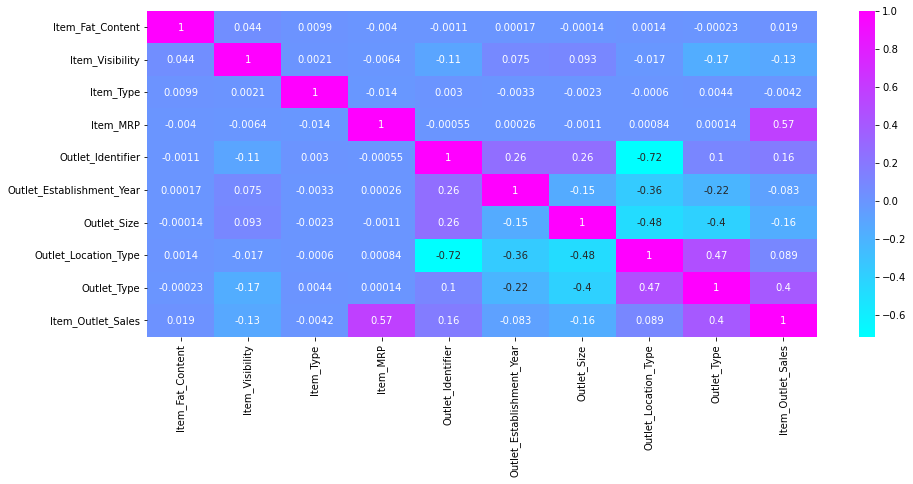

In [69]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), annot=True, cmap='cool')

outlet location type has high negative correlation with outlet identifier but it has no correlation with target. We will remove it,

In [70]:
df.drop('Outlet_Location_Type', axis=1, inplace=True)

In [71]:
vif_calc()

,variables,VIF FACTOR
0,Item_Fat_Content,1.522902
1,Item_Visibility,2.611196
2,Item_Type,2.477114
3,Item_MRP,4.922998
4,Outlet_Identifier,5.236386
5,Outlet_Establishment_Year,2.341591
6,Outlet_Size,5.539196
7,Outlet_Type,3.111385


The VIF factor is much lower now.

## Outliers

Item_Fat_Content                 AxesSubplot(0.125,0.71587;0.227941x0.16413)
Item_Visibility               AxesSubplot(0.398529,0.71587;0.227941x0.16413)
Item_Type                     AxesSubplot(0.672059,0.71587;0.227941x0.16413)
Item_MRP                        AxesSubplot(0.125,0.518913;0.227941x0.16413)
Outlet_Identifier            AxesSubplot(0.398529,0.518913;0.227941x0.16413)
Outlet_Establishment_Year    AxesSubplot(0.672059,0.518913;0.227941x0.16413)
Outlet_Size                     AxesSubplot(0.125,0.321957;0.227941x0.16413)
Outlet_Type                  AxesSubplot(0.398529,0.321957;0.227941x0.16413)
Item_Outlet_Sales            AxesSubplot(0.672059,0.321957;0.227941x0.16413)
dtype: object

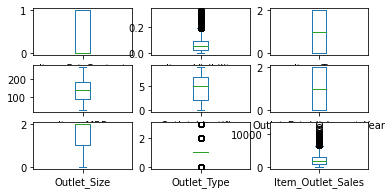

In [72]:
df.plot(kind='box', subplots=True, layout=(4, 3))

There are outliers in Item visibility, outlet type and item outlet sales.

In [73]:
z = np.abs(zscore(df))

print(np.where(z > 3))

(array([   49,    83,   108,   174,   434,   502,   521,   532,   854,
        1159,  1272,  1291,  1311,  1324,  1434,  1496,  1501,  1560,
        1575,  1644,  1651,  1805,  1827,  1841,  2088,  2122,  2251,
        2324,  2439,  2445,  2586,  2613,  2728,  2855,  2895,  3017,
        3206,  3399,  3458,  3474,  3488,  3497,  3540,  3750,  3767,
        3884,  3993,  4006,  4219,  4382,  4408,  4530,  4656,  4674,
        4789,  4941,  5031,  5150,  5287,  5374,  5732,  5734,  5795,
        5837,  5880,  5891,  5946,  6008,  6012,  6179,  6536,  6576,
        6622,  6674,  6786,  6903,  7005,  7088,  7107,  7121,  7215,
        7250,  7278,  7388,  7499,  7558,  7603,  7744,  7866,  7949,
        8194,  8215,  8273,  8345,  8432,  8569,  8599,  8601,  8612,
        8661,  8856,  8908,  8997,  9066,  9160,  9381,  9394,  9569,
        9714,  9779,  9793,  9934, 10039, 10139, 10233, 10335, 10346,
       10380, 10438, 10442, 10542, 10702, 10753, 10888, 10903, 10916,
       11027, 11039

In [74]:
df.shape

(14204, 9)

In [75]:
len(np.where(z > 3)[0])

173

In [76]:
#df = df[(z<3).all(axis=1)]

In [77]:
#df.shape

We cannot remove outliers because it will remove the entire data.

### Splitting data for training and testing

In [78]:
x = df.iloc[0:8523,0:-1]

In [79]:
x

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Type
0,0.0,0.016047,0.0,249.8092,9.0,2.0,1.0,1.0
1,1.0,0.019278,1.0,48.2692,3.0,0.0,1.0,2.0
2,0.0,0.016760,0.0,141.6180,9.0,2.0,1.0,1.0
3,1.0,0.000000,0.0,182.0950,0.0,2.0,2.0,0.0
4,0.0,0.000000,1.0,53.8614,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
8518,0.0,0.056783,2.0,214.5218,1.0,1.0,0.0,1.0
8519,1.0,0.046982,1.0,108.1570,7.0,0.0,2.0,1.0
8520,0.0,0.035186,1.0,85.1224,6.0,0.0,2.0,1.0
8521,1.0,0.145221,2.0,103.1332,3.0,0.0,1.0,2.0


In [80]:
y = df.iloc[0:8523,-1]

In [81]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

## Scaling x

In [82]:
st = StandardScaler()
x = st.fit_transform(x)
x

array([[-0.73814723, -0.97073217, -1.2777448 , ...,  1.38140272,
        -0.66408049, -0.25265831],
       [ 1.35474328, -0.90811123, -0.04470371, ..., -1.01625442,
        -0.66408049,  1.00297245],
       [-0.73814723, -0.95691733, -1.2777448 , ...,  1.38140272,
        -0.66408049, -0.25265831],
       ...,
       [-0.73814723, -0.59978449, -0.04470371, ..., -1.01625442,
         0.79995418, -0.25265831],
       [ 1.35474328,  1.53287976,  1.18833739, ..., -1.01625442,
        -0.66408049,  1.00297245],
       [-0.73814723, -0.41193591, -0.04470371, ...,  1.38140272,
         0.79995418, -0.25265831]])

In [83]:
x = pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7
0,-0.738147,-0.970732,-1.277745,1.747454,1.507813,1.381403,-0.664080,-0.252658
1,1.354743,-0.908111,-0.044704,-1.489023,-0.607071,-1.016254,-0.664080,1.002972
2,-0.738147,-0.956917,-1.277745,0.010040,1.507813,1.381403,-0.664080,-0.252658
3,1.354743,-1.281758,-1.277745,0.660050,-1.664513,1.381403,0.799954,-1.508289
4,-0.738147,-1.281758,-0.044704,-1.399220,-1.312032,0.182574,-2.128115,-0.252658
...,...,...,...,...,...,...,...,...
8518,-0.738147,-0.181193,1.188337,1.180783,-1.312032,0.182574,-2.128115,-0.252658
8519,1.354743,-0.371154,-0.044704,-0.527301,0.802852,-1.016254,0.799954,-0.252658
8520,-0.738147,-0.599784,-0.044704,-0.897208,0.450371,-1.016254,0.799954,-0.252658
8521,1.354743,1.532880,1.188337,-0.607977,-0.607071,-1.016254,-0.664080,1.002972


### Models

In [84]:
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
en = ElasticNet()
knn = KNeighborsRegressor()
svr = SVR()
dtr = DecisionTreeRegressor()
rf = RandomForestRegressor()

In [85]:
models = [lr, ridge, lasso, en, knn, svr, dtr, rf]

In [86]:
best_random_state = 0
lowest_error = 1436190
for i in range(100):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2, random_state=i)
    lr.fit(xtrain,ytrain)
    pred = lr.predict(xtest)
    error = mean_squared_error(ytest, pred)
    print(f'At random score {i}, mean squared error is {error}')
    if error < lowest_error:
        lowest_error = error
        best_random_state = i
print(f'Lowest error is {lowest_error} at random state {best_random_state}')

At random score 0, mean squared error is 1436190.585416603
At random score 1, mean squared error is 1472068.5932972545
At random score 2, mean squared error is 1575035.8898822605
At random score 3, mean squared error is 1374509.743436358
At random score 4, mean squared error is 1375779.1921736028
At random score 5, mean squared error is 1472629.615301663
At random score 6, mean squared error is 1445088.8388732017
At random score 7, mean squared error is 1578576.8355194265
At random score 8, mean squared error is 1537121.8388160071
At random score 9, mean squared error is 1446694.040805398
At random score 10, mean squared error is 1440169.8967534187
At random score 11, mean squared error is 1531018.4903517591
At random score 12, mean squared error is 1415529.5244881492
At random score 13, mean squared error is 1439115.5730582664
At random score 14, mean squared error is 1439710.1206734104
At random score 15, mean squared error is 1561061.8024331226
At random score 16, mean squared error

#### We choose random state 42

In [87]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2, random_state=42)

In [88]:
for i in models:
    i.fit(xtrain,ytrain)
    pred = i.predict(xtest)
    error = mean_squared_error(ytest, pred)
    training_score = cross_val_score(i, xtrain, ytrain, cv=5)
    print(f'Model {i} had training score of {training_score.mean()*100}% and a mean squared error of {round(error, 2)}')

Model LinearRegression() had training score of 49.95405074256964% and a mean squared error of 1305325.08
Model Ridge() had training score of 49.954106973642496% and a mean squared error of 1305325.83
Model Lasso() had training score of 49.95626400219934% and a mean squared error of 1304958.74
Model ElasticNet() had training score of 44.99675014816507% and a mean squared error of 1448754.74
Model KNeighborsRegressor() had training score of 50.8993211117535% and a mean squared error of 1208500.02
Model SVR() had training score of 4.513196914473245% and a mean squared error of 2460246.96
Model DecisionTreeRegressor() had training score of 18.045876216985434% and a mean squared error of 2189901.99
Model RandomForestRegressor() had training score of 54.67131398533562% and a mean squared error of 1190971.18


#### We will proceed with random forest regressor

In [89]:
parameters = {'criterion': ['squared_error', 'absolute_error', 'poisson'],
              "n_estimators": [200,500],
              'min_samples_leaf': [1, 2],
              "min_samples_split" : [2,4]}

In [90]:
grid = GridSearchCV(rf, parameters, cv=5, n_jobs=-1)

In [91]:
grid.fit(xtrain, ytrain)
grid.best_params_

{'criterion': 'absolute_error',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 500}

In [92]:
rf = RandomForestRegressor(criterion='absolute_error', min_samples_leaf=2, min_samples_split=4, n_estimators=500)

In [93]:
cross_val_score(rf, xtrain,ytrain,cv=5)

array([0.55716276, 0.5705261 , 0.56667474, 0.57796505, 0.56165035])

In [94]:
rf.fit(xtrain, ytrain)
pred = rf.predict(xtest)
print(f'The cross validated score of this model is: {(cross_val_score(rf, xtrain,ytrain,cv=5).mean())*100}')

The cross validated score of this model is: 56.57907126724544


In [95]:
print(f'The mean squared error is {mean_squared_error(ytest, pred)}')

The mean squared error is 1127209.997548274


In [96]:
print(f'The r2 score is {r2_score(ytest, pred)}')

The r2 score is 0.5852750508943597


#### Conclusion: Random Forest Regressor is the best model with cross val score of 56.57%, r2 score of 58.52% and with mse of 1127209.99

## Saving the model

In [97]:
import pickle
filename = 'bigdatamart.pkl'
pickle.dump(rf, open(filename, 'wb'))

loading it back and checking score

In [98]:
model = pickle.load(open('bigdatamart.pkl', 'rb'))
model.fit(xtrain, ytrain)
pred = model.predict(xtest)
r2_score(ytest,pred)*100

58.58751380829907